<h1 align="center"> Sensordatenfusion Tutorium 01 </h1>

<h3 align="center"> Generieren von Groundtruth und Messungen </h3>

<h3 align="center"> Vorerst einige Imports und das erstellen der Ausgabe </h3>

In [6]:
%matplotlib inline

from datetime import timedelta
from datetime import datetime

import numpy as np

<h3 align="center"> Jetzt die Parameter für Groundtruth festlegen </h3>


In [7]:
# Geschwindigkeit, Beschleunigung, omega ..

<h3 align="center"> Nun wird die Groundtruth erstellt </h3>

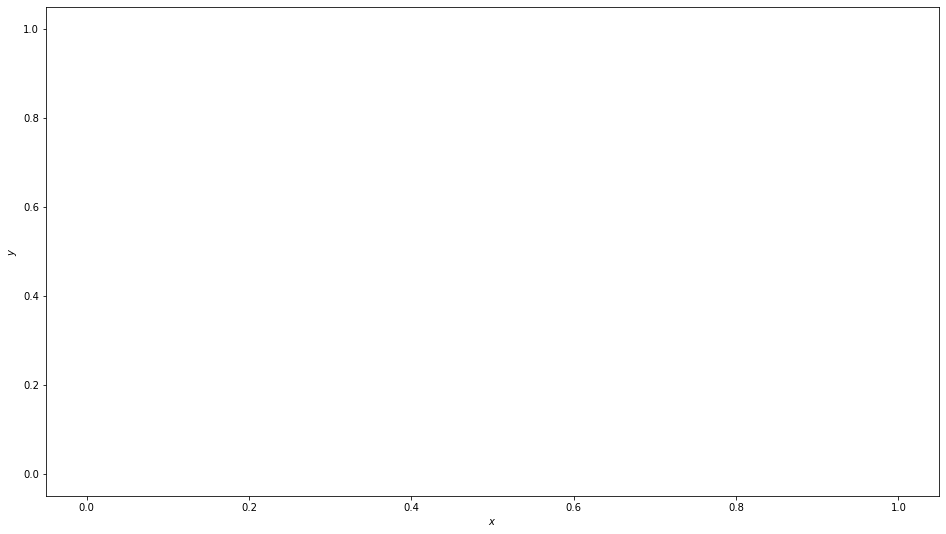

In [8]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(16, 9))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

from stonesoup.types.groundtruth import GroundTruthPath, GroundTruthState

truth = GroundTruthPath()
start_time = datetime.now()

# data = np.linspace(0, (2 * np.pi )/ omega, 100, endpoint = True)
data = []
"""
    "data"-Array mit den Punkten füllen
"""

for t in data:
    """
        Positionsvektor x_t berechnen
    
    """
    truth.append(GroundTruthState(np.array([[x], [y]]), timestamp=start_time+timedelta(seconds=t)))

ax.plot([state.state_vector[0, 0] for state in truth], 
        [state.state_vector[1, 0] for state in truth], 
        linestyle="--", color="grey")

<h3 align="center"> Jetzt werden die Messungen generiert </h3>

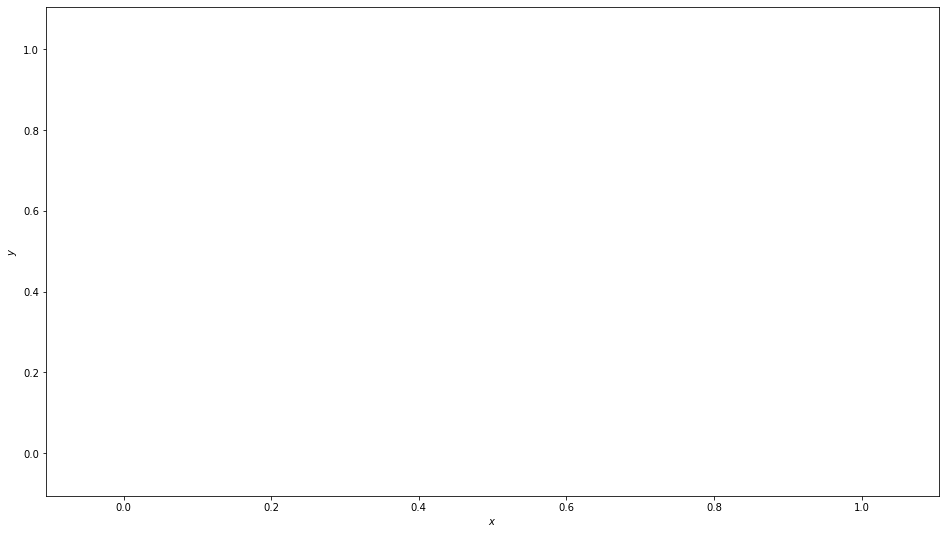

In [9]:
from stonesoup.types.detection import Detection

measurements = []
for state in truth:
    """
        x- und y-offsets berechnen und mit den Groundtruth-Daten verrechnen.
        
    """
    measurements.append(Detection(np.array([x, y]), timestamp=state.timestamp))
    
# Messungen plotten
ax.scatter([state.state_vector[0, 0] for state in measurements], 
           [state.state_vector[1, 0] for state in measurements], 
           color='black', s = 10)
figure
